In [93]:
#Top-down Dynamic Programming
def F1(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return F1(n-1) + F1(n-2)

In [94]:
F1(40)

102334155

In [95]:
#Top-down Dynamic Programming with Memoization
def F2_t(n, F):
    if F[n] == None:
        if n == 0:
            F[n] = 0
        elif n == 1:
            F[n] = 1
        else:
            F[n] = F2_t(n-1, F) + F2_t(n-2, F)
    return F[n]
def F2(n):
    return F2_t(n, [None] * (n + 1))

In [97]:
F2(40)

102334155

In [98]:
#  Iteration with Constant Storage
def F3(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        a, b = 0, 1
        for _ in range(2, n+1):
            a, b = b, a + b
        return b

In [99]:
F3(95)

31940434634990099905

In [100]:
#Binet's Formula
import math
def F4(n):
    phi = (1 + math.sqrt(5)) / 2
    psi = (1 - math.sqrt(5)) / 2
    return round((phi**n - psi**n) / math.sqrt(5))

In [101]:
F4(95)

31940434634990198784

In [102]:
for i in range(101):
    if F3(i) != F4(i):
        print("Mismatch at", i)
        print(F3(i) - F4(i))

Mismatch at 71
-1
Mismatch at 72
-1
Mismatch at 73
-2
Mismatch at 74
-3
Mismatch at 75
-5
Mismatch at 76
-9
Mismatch at 77
-14
Mismatch at 78
-24
Mismatch at 79
-39
Mismatch at 80
-59
Mismatch at 81
-102
Mismatch at 82
-161
Mismatch at 83
-279
Mismatch at 84
-464
Mismatch at 85
-743
Mismatch at 86
-1207
Mismatch at 87
-2014
Mismatch at 88
-3157
Mismatch at 89
-5171
Mismatch at 90
-8584
Mismatch at 91
-14523
Mismatch at 92
-22595
Mismatch at 93
-37118
Mismatch at 94
-59713
Mismatch at 95
-98879
Mismatch at 96
-166784
Mismatch at 97
-265663
Mismatch at 98
-440639
Mismatch at 99
-722686
Mismatch at 100
-1196093


In [103]:
#optimized Binet's Formula
import math
def F5(n):
    sqrt5 = math.sqrt(5)
    phi = (1 + sqrt5) / 2
    return round((phi**n) / sqrt5)

In [104]:
for i in range(1, 1001):
    a = F3(i)
    b = F5(i)
    if a != b:
        print("Mismatch at", i)
        print(((a - b)/a) * 100, "% - ", (a-b))

Mismatch at 71
-3.2461048565937046e-13 % -  -1
Mismatch at 72
-2.0062031324210126e-13 % -  -1
Mismatch at 73
-2.4798034483453836e-13 % -  -2
Mismatch at 74
-2.298904224744962e-13 % -  -3
Mismatch at 75
-2.368001579621856e-13 % -  -5
Mismatch at 76
-2.6343098309155454e-13 % -  -9
Mismatch at 77
-2.532589130405904e-13 % -  -14
Mismatch at 78
-2.683244849364666e-13 % -  -24
Mismatch at 79
-2.6947968401988647e-13 % -  -39
Mismatch at 80
-2.519566316951393e-13 % -  -59
Mismatch at 81
-2.692069785086539e-13 % -  -102
Mismatch at 82
-2.626179323436148e-13 % -  -161
Mismatch at 83
-2.8126459316743617e-13 % -  -279
Mismatch at 84
-2.8909541355539626e-13 % -  -464
Mismatch at 85
-2.8610430632699113e-13 % -  -743
Mismatch at 86
-2.872468076242464e-13 % -  -1207
Mismatch at 87
-2.96223675730884e-13 % -  -2014
Mismatch at 88
-2.869770996537125e-13 % -  -3157
Mismatch at 89
-2.9050897743563034e-13 % -  -5171
Mismatch at 90
-2.980486016707424e-13 % -  -8584
Mismatch at 91
-3.1164924332869845e-13 % - 

In [105]:
#matrix exponentiation
def mat_mul_opt(m1):
    m = [[0,0],[0,0]]
    m[0][0] = m1[0][0] + m1[0][1]
    m[0][1] = m1[0][0]
    m[1][0] = m1[1][0] + m1[1][1]
    m[1][1] = m1[1][0]
    return m

def F6(n):
    if n == 0:
        r = 0
    else:
        m = [[1,0],[0,1]]  #identity matrix
        for _ in range(1, n):
            m = mat_mul_opt(m)
        r = m[0][0]
    return r

In [106]:
F6(96)

51680708854858323072

In [107]:
# F7
def mat_mul(m, n):
    r = [[0,0],[0,0]]
    r[0][0] = m[0][0]*n[0][0] + m[0][1]*n[1][0]
    r[0][1] = m[0][0]*n[0][1] + m[0][1]*n[1][1]
    r[1][0] = m[1][0]*n[0][0] + m[1][1]*n[1][0]
    r[1][1] = m[1][0]*n[0][1] + m[1][1]*n[1][1]
    return r

def mat_pow_recur(m, n):
    r = [[1,0],[0,1]]  #identity matrix
    if n>1:
        r = mat_pow_recur(m, n >> 1) # n//2
        r = mat_mul(r, r)
    if n % 2 == 1:
        r = mat_mul(r, m)
    return r

def F7(n):
    if n == 0:
        r = 0
    else:
        m = mat_pow_recur([[1,1],[1,0]], n-1)
        r = m[0][0]
    return r

In [108]:
F7(96)

51680708854858323072

In [109]:
#Iteration with Constant Storage
def mat_pow_iter(m, n):
    n_bits = bin(n)[2:] #binary representation of n and exclude '0b' prefix
    r = [[1,0],[0,1]]  #identity matrix
    for bit in n_bits:
        r = mat_mul(r, r)
        if bit == '1':
            r = mat_mul(r, m)
    return r

def F8(n):
    if n == 0:
        return 0
    else:
        m = mat_pow_iter([[1,1],[1,0]], n-1)
        return m[0][0]

In [110]:
F8(96)

51680708854858323072

In [114]:
# Squaring and recursive formula
def F9_t(n, F):
    if F[n] == None:
        if n == 0:
            F[n] = 0
        elif n == 1:
            F[n] = 1
        elif n == 2:
            F[n] = 1
        else:
            k = n >> 1
            f1 = F9_t(k, F)
            f2 = F9_t(k+1, F)
            if n % 2 == 0:
                F[n] = 2 * f1 * f2 - f1 * f1
            else:
                F[n] = f2 * f2 + f1 * f1
    return F[n]

def F9(n):
    return F9_t(n, [None]*(n+1))

In [115]:
F9(96)

51680708854858323072

In [116]:
#iterative version of F9
def F10(n):
    F = {}

    # find indexes that need F values
    qinx = []  # queue of indexes
    qinx.append(n)
    F[n] = -1  # -1 to mark such values
    while qinx:
        k = qinx.pop() >> 1
        if k not in F:
            F[k] = -1
            qinx.append(k)
        if (k + 1) not in F:
            F[k + 1] = -1
            qinx.append(k + 1)

    # set base values
    F[0], F[1], F[2] = 0, 1, 1

    # fill the indexes that need values
    keys_sorted = sorted(F.keys())
    for k in keys_sorted[3:]:
        k2 = k >> 1
        f1, f2 = F[k2], F[k2 + 1]
        if k % 2 == 0:
            F[k] = 2 * f2 * f1 - f1 * f1
        else:
            F[k] = f2 * f2 + f1 * f1

    r = F[n]
    return r


In [117]:
F10(96)

51680708854858323072

In [118]:
test_min = [5, 7, 10, 12, 15, 18, 20, 22, 25, 30]
test_med = [32, 35, 38, 40, 45, 50, 55, 60, 65, 70]
test_high = [80, 120, 200, 300, 400, 500, 600, 700, 800, 900]
final_boss = [1000, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8500, 10000]

In [155]:
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def compute_print_and_plot_tests():

    # Define algorithm groups for each test set
    all_algorithms = [F1, F2, F3, F4, F5, F6, F7, F8, F9, F10]
    algorithms_2_to_10 = [F2,F3, F4, F5, F6, F7, F8, F9, F10]
    algorithms_final = [F3, F7, F8, F9, F10]
    algorithms_final_fast = [F7, F8, F9, F10]

    test_configs = [
        ("test_min", test_min, all_algorithms),
        ("test_med", test_med, algorithms_2_to_10),
        ("test_high", test_high, algorithms_2_to_10),
        ("final_boss", final_boss, algorithms_final),
        ("final_boss (fastest: F7, F8, F9, F10)", final_boss, algorithms_final_fast),
    ]

    for test_name, test_set, algorithms in test_configs:
        results = {alg.__name__: [] for alg in algorithms}

        print(f"\n{'='*80}")
        print(f"Running {test_name} with algorithms: {[alg.__name__ for alg in algorithms]}")
        print(f"{'='*80}")

        for n in test_set:
            for alg in algorithms:
                start_time = time.perf_counter_ns()
                alg(n)
                end_time = time.perf_counter_ns()
                elapsed_time_ns = end_time - start_time
                elapsed_time_s = elapsed_time_ns / 1e9
                results[alg.__name__].append((n, elapsed_time_s, elapsed_time_ns))

        # Plot results with high precision
        fig, ax = plt.subplots(figsize=(12, 7))
        for alg_name, times in results.items():
            ns = [n for n, t_s, t_ns in times]
            ts = [t_s for n, t_s, t_ns in times]
            ax.plot(ns, ts, marker='o', markersize=4, linewidth=1.5, label=alg_name)

        ax.set_xlabel('n', fontsize=12)
        ax.set_ylabel('Time (seconds)', fontsize=12)
        ax.set_title(f'Fibonacci Algorithm Performance - {test_name}', fontsize=14)
        ax.legend(loc='best', fontsize=10)
        ax.grid(True, which='both', linestyle='--', alpha=0.7)
        
        # Use scientific notation for y-axis
        ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
        ax.yaxis.get_offset_text().set_fontsize(10)
        
        # Add minor gridlines for more precision
        ax.minorticks_on()
        ax.grid(True, which='minor', linestyle=':', alpha=0.4)
        
        plt.tight_layout()
        plt.show()
        
        # Print statistics summary
        print(f"\n--- Summary for {test_name} ---")
        for alg_name, times in results.items():
            ts = [t_s for n, t_s, t_ns in times]
            avg_time = sum(ts) / len(ts)
            min_time = min(ts)
            max_time = max(ts)
            print(f"{alg_name}: avg={avg_time:.15e}s, min={min_time:.15e}s, max={max_time:.15e}s")


Running test_min with algorithms: ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']


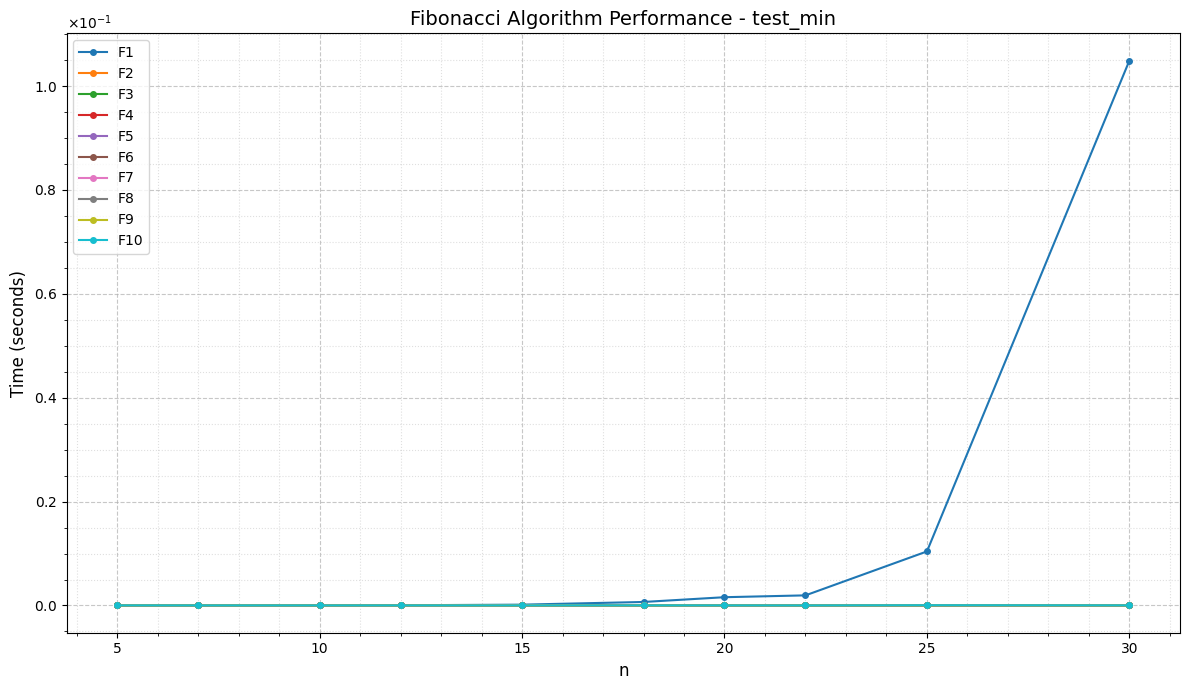


--- Summary for test_min ---
F1: avg=1.197667000000000e-02s, min=4.200000000000000e-06s, max=1.049140000000000e-01s
F2: avg=8.260000000000001e-06s, min=3.200000000000000e-06s, max=3.170000000000000e-05s
F3: avg=3.880000000000000e-06s, min=1.100000000000000e-06s, max=1.270000000000000e-05s
F4: avg=8.210000000000001e-06s, min=1.000000000000000e-06s, max=3.200000000000000e-05s
F5: avg=1.400000000000000e-06s, min=5.000000000000000e-07s, max=3.200000000000000e-06s
F6: avg=7.550000000000001e-06s, min=4.800000000000000e-06s, max=1.420000000000000e-05s
F7: avg=8.299999999999998e-06s, min=4.100000000000000e-06s, max=1.630000000000000e-05s
F8: avg=1.116000000000000e-05s, min=3.900000000000000e-06s, max=2.700000000000000e-05s
F9: avg=4.499999999999999e-06s, min=2.200000000000000e-06s, max=8.700000000000000e-06s
F10: avg=1.591000000000000e-05s, min=6.500000000000000e-06s, max=4.600000000000000e-05s

Running test_med with algorithms: ['F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']


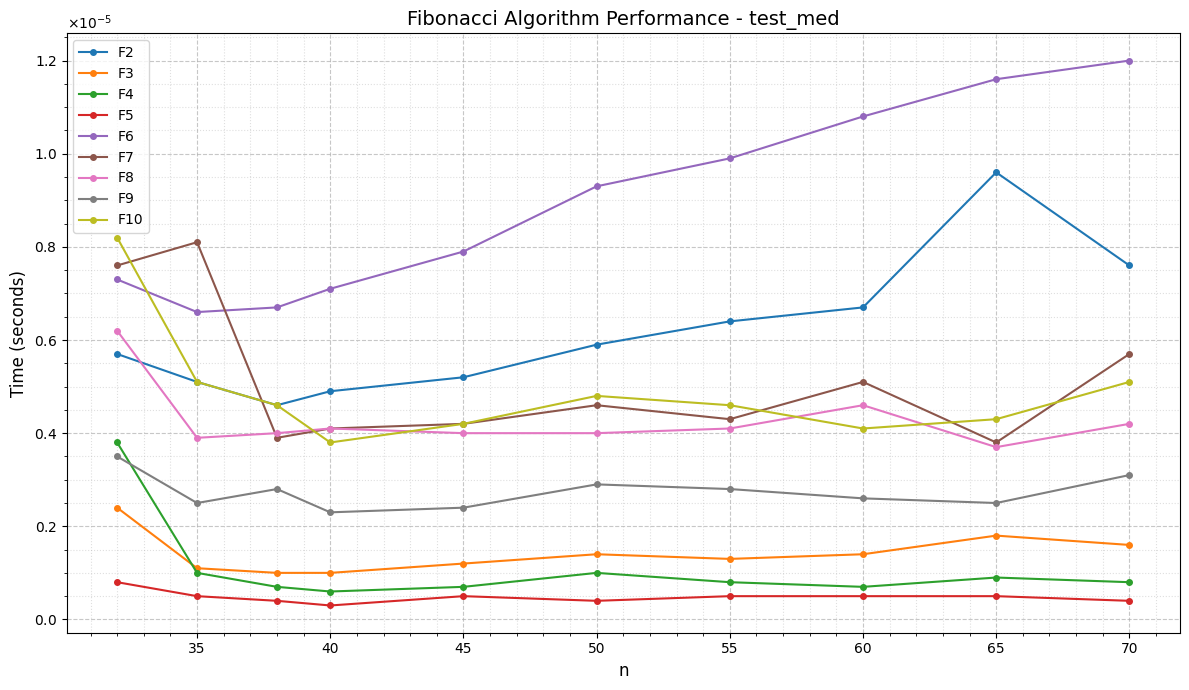


--- Summary for test_med ---
F2: avg=6.169999999999999e-06s, min=4.600000000000000e-06s, max=9.600000000000000e-06s
F3: avg=1.420000000000000e-06s, min=1.000000000000000e-06s, max=2.400000000000000e-06s
F4: avg=1.100000000000000e-06s, min=6.000000000000000e-07s, max=3.800000000000000e-06s
F5: avg=4.800000000000000e-07s, min=3.000000000000000e-07s, max=8.000000000000000e-07s
F6: avg=8.919999999999999e-06s, min=6.600000000000000e-06s, max=1.200000000000000e-05s
F7: avg=5.140000000000000e-06s, min=3.800000000000000e-06s, max=8.100000000000000e-06s
F8: avg=4.280000000000000e-06s, min=3.700000000000000e-06s, max=6.200000000000000e-06s
F9: avg=2.740000000000000e-06s, min=2.300000000000000e-06s, max=3.500000000000000e-06s
F10: avg=4.880000000000001e-06s, min=3.800000000000000e-06s, max=8.199999999999999e-06s

Running test_high with algorithms: ['F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']


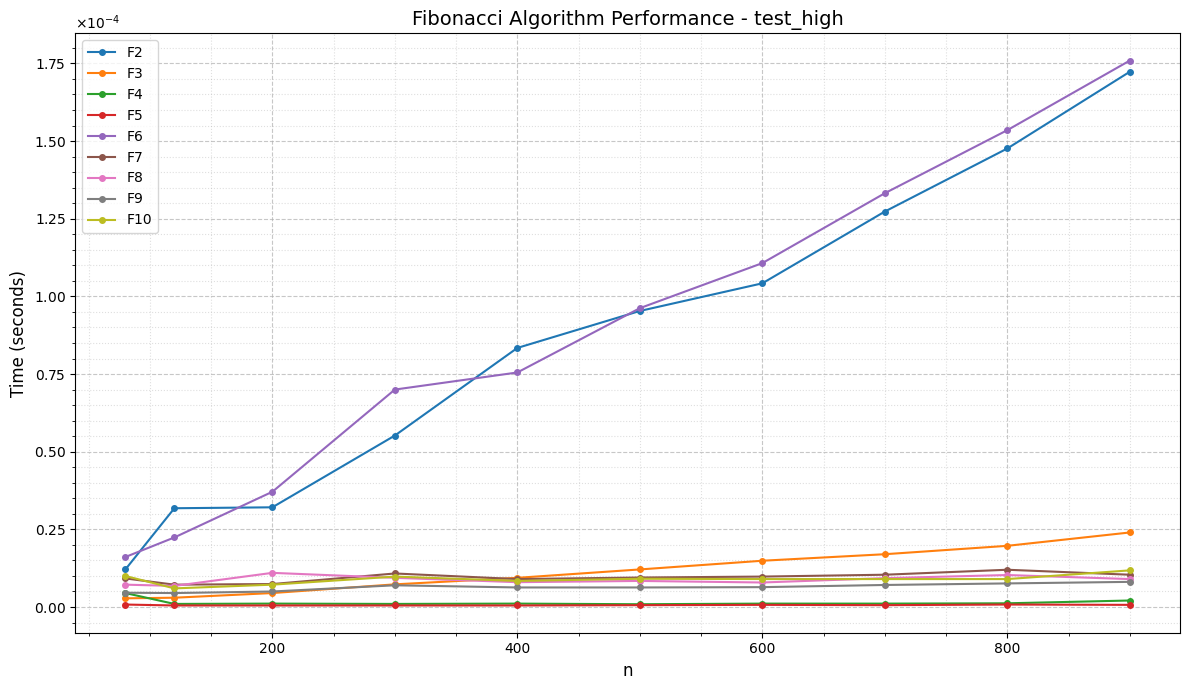


--- Summary for test_high ---
F2: avg=8.613000000000000e-05s, min=1.210000000000000e-05s, max=1.723000000000000e-04s
F3: avg=1.147000000000000e-05s, min=2.800000000000000e-06s, max=2.400000000000000e-05s
F4: avg=1.510000000000000e-06s, min=9.000000000000000e-07s, max=4.500000000000000e-06s
F5: avg=6.200000000000000e-07s, min=5.000000000000000e-07s, max=8.000000000000000e-07s
F6: avg=8.905999999999999e-05s, min=1.610000000000000e-05s, max=1.759000000000000e-04s
F7: avg=9.569999999999998e-06s, min=7.200000000000000e-06s, max=1.200000000000000e-05s
F8: avg=8.730000000000001e-06s, min=6.800000000000000e-06s, max=1.100000000000000e-05s
F9: avg=6.290000000000000e-06s, min=4.500000000000000e-06s, max=8.100000000000000e-06s
F10: avg=8.930000000000001e-06s, min=6.000000000000000e-06s, max=1.180000000000000e-05s

Running final_boss with algorithms: ['F3', 'F7', 'F8', 'F9', 'F10']


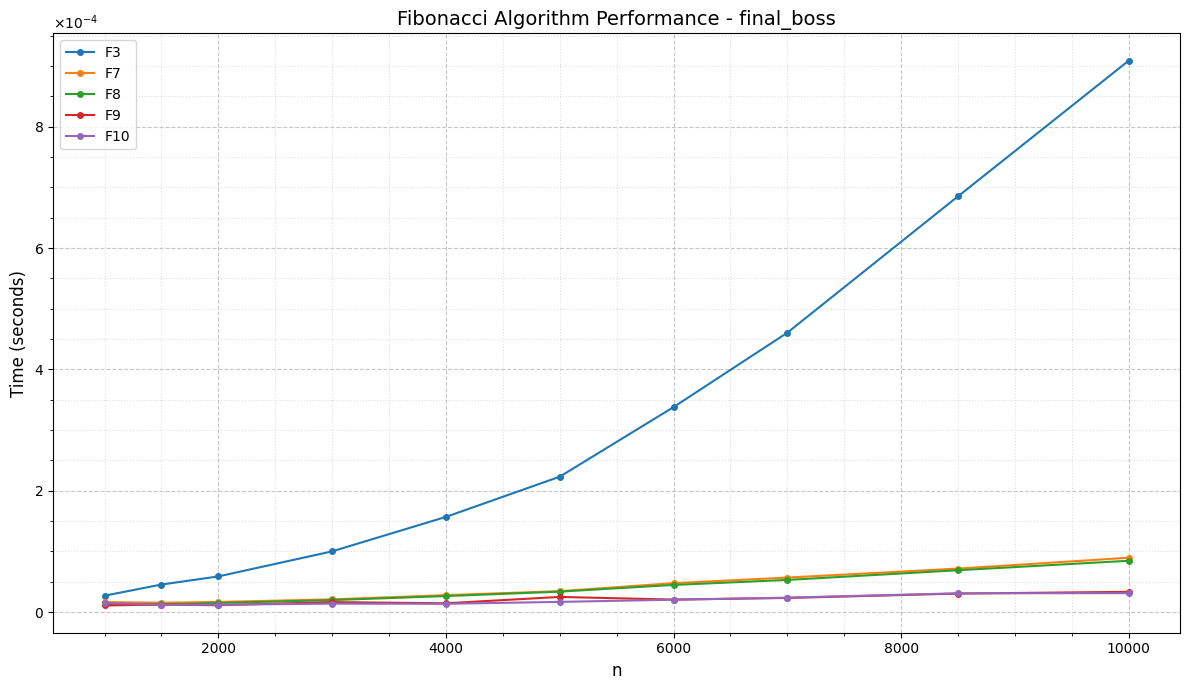


--- Summary for final_boss ---
F3: avg=3.004400000000000e-04s, min=2.700000000000000e-05s, max=9.091000000000000e-04s
F7: avg=3.979000000000000e-05s, min=1.530000000000000e-05s, max=8.960000000000000e-05s
F8: avg=3.725000000000000e-05s, min=1.270000000000000e-05s, max=8.460000000000000e-05s
F9: avg=1.984000000000000e-05s, min=1.090000000000000e-05s, max=3.340000000000000e-05s
F10: avg=1.902000000000000e-05s, min=1.210000000000000e-05s, max=3.120000000000000e-05s

Running final_boss (fastest: F7, F8, F9, F10) with algorithms: ['F7', 'F8', 'F9', 'F10']


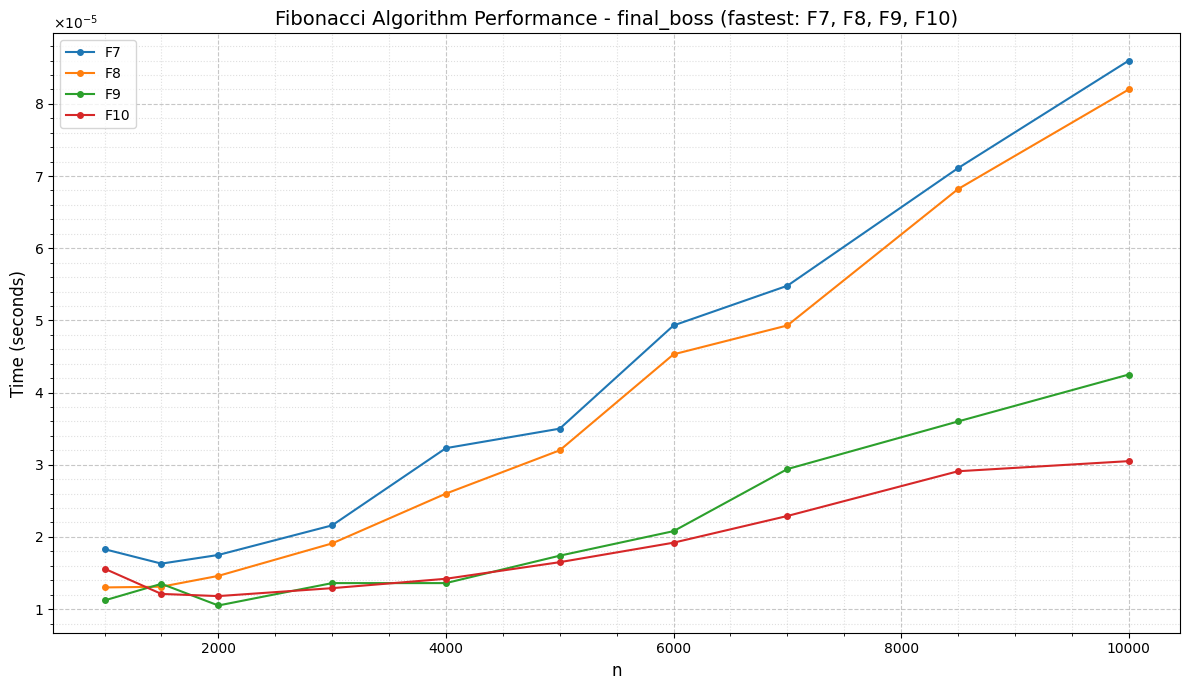


--- Summary for final_boss (fastest: F7, F8, F9, F10) ---
F7: avg=4.022000000000000e-05s, min=1.630000000000000e-05s, max=8.600000000000000e-05s
F8: avg=3.626000000000000e-05s, min=1.300000000000000e-05s, max=8.200000000000000e-05s
F9: avg=2.085000000000000e-05s, min=1.050000000000000e-05s, max=4.250000000000000e-05s
F10: avg=1.848000000000000e-05s, min=1.180000000000000e-05s, max=3.050000000000000e-05s


In [156]:
compute_print_and_plot_tests()